<a href="https://colab.research.google.com/github/vkjadon/aerial-robotics-drone-quadcopter-ipynb/blob/main/4SODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

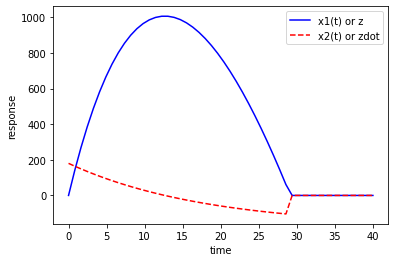

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

c=0.01
k=0
g=9.81
mass=0.18

# function that returns dz/dt
def model(z,t,u):
    x1=z[0]     # Intial Condition for First FODE
    x2=z[1]     # Initial condition for Second FODE
    dx1dt=x2                    # First FODE
    dx2dt=(u-c*x2-k*x1)/mass-g  # Seconf FODE
    dxdt = [dx1dt,dx2dt]
    return dxdt

# initial condition
z0=[0,180]

# number of time points
finalTime=40
timeSteps=50

# time points
time=np.linspace(0,finalTime,timeSteps)

# step input
u=np.zeros(timeSteps)
# change to 2.0 at time = 5.0
#u[5:]=12.0

# store solution
x1=np.empty_like(time)
x2=np.empty_like(time)

# record initial conditions
x1[0]=z0[0]   # x1 or z
x2[0]=z0[1]   # x2 or zdot

# solve ODE
for i in range(1,timeSteps):
    # span for next time step
    timeSpan=[time[i-1],time[i]]
    # solve for next step
    z=odeint(model,z0,timeSpan,args=(u[i],))
    # store solution for plotting
    x1[i]=z[1][0]
    if x1[i]<0:
        x1[i]=0
    x2[i]=z[1][1]
    if x1[i]==0:
        x2[i]=0
    # next initial condition
    z0=z[1]
    #print(z0)

# plot results

plt.plot(time,x1,'b-',label='x1(t) or z')
plt.plot(time,x2,'r--',label='x2(t) or zdot')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()


[ 0.          0.02002002  0.04004004  0.06006006  0.08008008  0.1001001
  0.12012012  0.14014014  0.16016016  0.18018018  0.2002002   0.22022022
  0.24024024  0.26026026  0.28028028  0.3003003   0.32032032  0.34034034
  0.36036036  0.38038038  0.4004004   0.42042042  0.44044044  0.46046046
  0.48048048  0.5005005   0.52052052  0.54054054  0.56056056  0.58058058
  0.6006006   0.62062062  0.64064064  0.66066066  0.68068068  0.7007007
  0.72072072  0.74074074  0.76076076  0.78078078  0.8008008   0.82082082
  0.84084084  0.86086086  0.88088088  0.9009009   0.92092092  0.94094094
  0.96096096  0.98098098  1.001001    1.02102102  1.04104104  1.06106106
  1.08108108  1.1011011   1.12112112  1.14114114  1.16116116  1.18118118
  1.2012012   1.22122122  1.24124124  1.26126126  1.28128128  1.3013013
  1.32132132  1.34134134  1.36136136  1.38138138  1.4014014   1.42142142
  1.44144144  1.46146146  1.48148148  1.5015015   1.52152152  1.54154154
  1.56156156  1.58158158  1.6016016   1.62162162  1.64

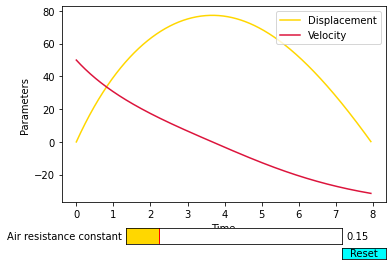

In [2]:
#LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.widgets import Slider, Button

#MATHEMATICAL MODEL
def model(x, t, c, m):
    x1 = x[0]  # displacement
    x2 = x[1]  # velocity
    dx1dt = x2
    airres = -(x2 / abs(x2)) * (c * pow(x2, 2) / m)  # drag force due to air resistance
    dx2dt = -9.81 + airres / m  # gravitaional acceleration
    dxdt = [dx1dt, dx2dt]
    return dxdt

#INITIAL CONDITIONS
velocity = 50
displacement = 0
airResistance = 0.056
c = 0.15
mass = 5

#CREATING SUBPLOT
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.15, bottom=0.2)

## CONSTRUCTING TIME ARRAY
finalTime = 20
timePoints = 1000
timeArray = np.linspace(0, finalTime, timePoints)
print(timeArray)

## SOLVING ODE
y1 = np.empty_like(timePoints)
y2 = np.empty_like(timePoints)

z = odeint(model, [displacement, velocity], timeArray, args=(c, mass))
zT = z.transpose()
print("\nOutput from odeint = ", zT)
y1 = zT[0]
y2 = zT[1]


## CREATING A FUNCTION TO PLOT THE DATA
def plot(y1, y2):
    ax.cla() #clearing the subplot
    # Creating a method to find the last real point for displacement
    a = len(np.argwhere(y1[y1 > 0]))
    print("\nIndex of y1 where displacement has least positve value = ", a)
    print("Value of last displacement = ", y1[a], " metres")
    # Finding the point where velocity = 0
    b = len(np.argwhere(y2[y2 > 0]))
    print('\nIndex of y2 where velocity is approximately 0 = ', b)
    print("Value at above index = ", y2[b], " m/s")

    displacement_plot, = ax.plot(timeArray[0:(a + 1)], y1[0:(a + 1)], label='Displacement', color='gold')
    velocity_plot, = ax.plot(timeArray[0:(a + 1)], y2[0:(a + 1)], label='Velocity', color='crimson')
    ax.set_ylabel('Parameters')
    ax.set_xlabel('Time')
    ax.legend(loc='upper right')

    print("\nTime of Flight = " + str(timeArray[a + 1]) + " seconds")
    print("Max Height = " + str(y1[b]) + " metres at time = " + str(timeArray[b]) + " seconds\n")


#Configuring slider
arConstant_slider_config = plt.axes([0.30, 0.055, 0.50, 0.055])
arConstant_slider = Slider(arConstant_slider_config, label="Air resistance constant", valmin=0, valmax=1, valinit=0.15, color='gold')


# PLOTING WITH THE SLIDER
def update(c):
    print("AR constant = ", c)
    velocity = 50
    displacement = 0
    mass = 5
    z = odeint(model, [displacement, velocity], timeArray, args=(c, mass))
    zT = z.transpose()
    print("\nOutput from odeint = ", zT)
    y1 = zT[0]
    y2 = zT[1]
    plot(y1, y2)


#reset button
reset_config = plt.axes([0.8, 0.002, 0.1, 0.04])
reset_button = Button(ax=reset_config, label="Reset", color='cyan', hovercolor='gold')


# Defining the reset function
def Reset(event):
    arConstant_slider.reset()

plot(y1, y2)
arConstant_slider.on_changed(update)
reset_button.on_clicked(Reset)

plt.show()


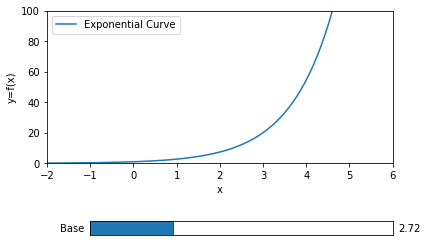

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

base=2.718241824
x=np.linspace(-5, 10, 160) 
y=base*np.ones_like(x)


# Create just a figure and only one subplot
fig=plt.subplots()

plt.subplots_adjust(left = 0.1, bottom = 0.35)

#plotting curve
curve,=plt.plot(x, np.power(y,x), label = 'Exponential Curve') 

plt.axis([-2, 6, 0, 100])

plt.ylabel('y=f(x)')
plt.xlabel('x')

plt.legend()

#left, bottom, width, height (range 0 to 1) Slider axis
axSliderBase=plt.axes([0.2, 0.1, 0.7, 0.05])
# configuring sliders
#Slider(ax, label, valmin, valmax, valinit=0.5, valfmt='%1.2f')
baseSlider=Slider(axSliderBase, 'Base', 0.001, 10.0, valinit=base, valstep=0.01)

def updatePlot(val):
    base=baseSlider.val
    y=base*np.ones_like(x)
    curve.set_ydata(np.power(y,x))
    plt.draw()

baseSlider.on_changed(updatePlot)

#Plot viewer window is invoked by the show() function 
plt.show()
